In [1]:
!pip install pmdarima

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

## TASK - 1

In [3]:
df=pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv",index_col="date",parse_dates=True)
print(df)


             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333
...               ...        ...         ...           ...
2017-04-20  34.500000  27.500000    5.562500    998.625000
2017-04-21  34.250000  39.375000    6.962500    999.875000
2017-04-22  32.900000  40.900000    8.890000   1001.600000
2017-04-23  32.875000  27.500000    9.962500   1002.125000
2017-04-24  32.000000  27.142857   12.157143   1004.142857

[114 rows x 4 columns]


In [4]:
df1=pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv",index_col="date",parse_dates=True)
print(df1)


             meantemp    humidity  wind_speed  meanpressure
date                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667
2013-01-02   7.400000   92.000000    2.980000   1017.800000
2013-01-03   7.166667   87.000000    4.633333   1018.666667
2013-01-04   8.666667   71.333333    1.233333   1017.166667
2013-01-05   6.000000   86.833333    3.700000   1016.500000
...               ...         ...         ...           ...
2016-12-28  17.217391   68.043478    3.547826   1015.565217
2016-12-29  15.238095   87.857143    6.000000   1016.904762
2016-12-30  14.095238   89.666667    6.266667   1017.904762
2016-12-31  15.052632   87.000000    7.325000   1016.100000
2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]


In [5]:
#Concating train and test dataset 
x=[df1,df]
df1_df=pd.concat(x)
df1_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [6]:
new_df=df1_df.copy()

In [7]:
temp=df1_df["meantemp"]
temp.head()

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
Name: meantemp, dtype: float64

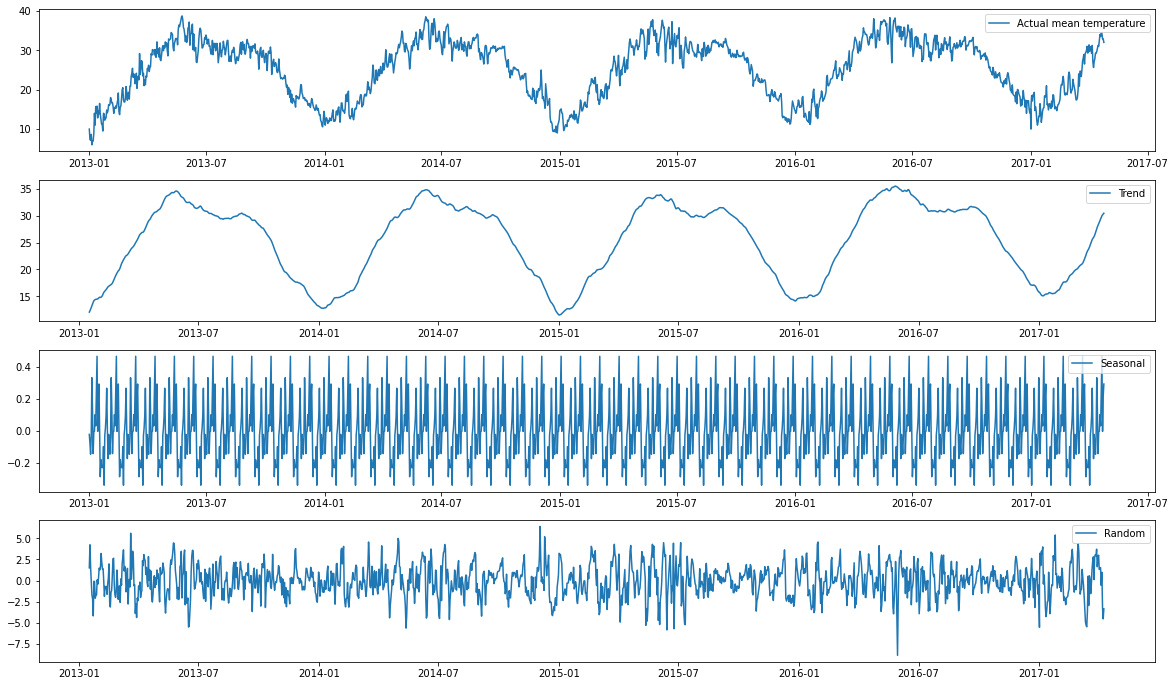

In [8]:
decomposition=seasonal_decompose(temp,freq=30)
    
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residuals=decomposition.resid

_, ax = plt.subplots(4,1,figsize=(20,12))
 
#orginal data

plt.subplot(411)
plt.plot(temp,label="Actual mean temperature")
plt.legend()

#Trend
plt.subplot(412)
plt.plot(d_trend ,label="Trend")
plt.legend()

#Seasonality
plt.subplot(413)
plt.plot(d_seasonal,label="Seasonal")
plt.legend()

#Residue
plt.subplot(414)
plt.plot(d_residuals,label="Random")
plt.legend()
plt.show()

In [9]:
#Simple Exponent - when there is no trend/seasonality

def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df1_df = pd.DataFrame({'actual':data, 'forecast':pdct})              
    return(model,df1_df)

In [10]:
data = df1_df['meantemp']

In [11]:
df1_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [12]:
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df1_df = simplesmoothing(data,a)
    d_simple_exp[a] = df1_df.forecast 

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no

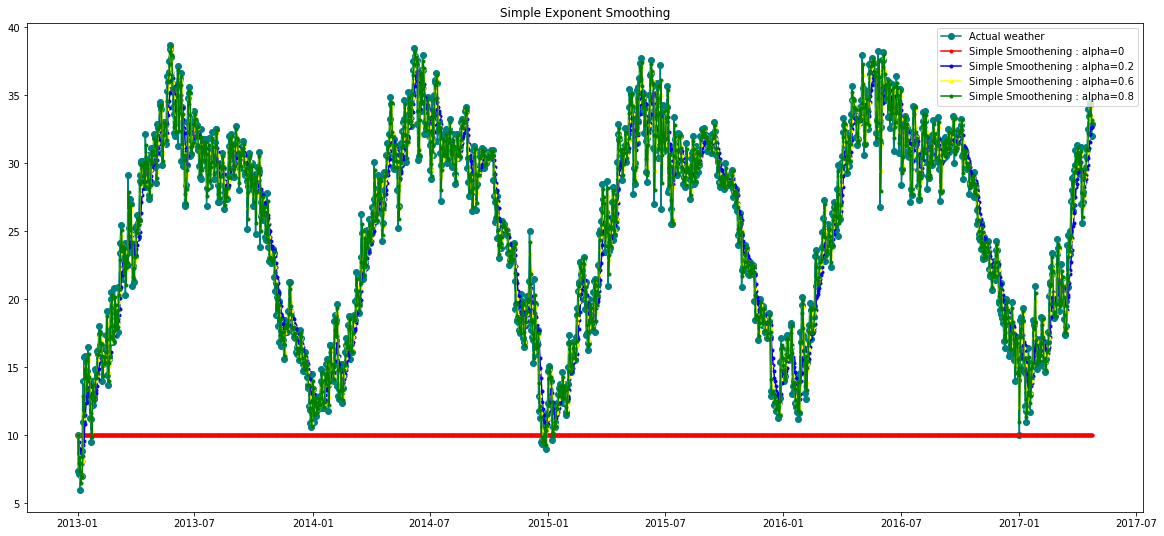

In [13]:
colors = ['red', 'blue', 'yellow', 'green']  

# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20, 9))
plt.plot(data, marker='o', color='teal',label='Actual weather ')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

### Double Exponent Smoothing (trend and no seasonality)


In [14]:
model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

date
2013-01-01     4.787493
2013-01-02     6.698444
2013-01-03     7.777360
2013-01-04     8.532757
2013-01-05     9.450466
                ...    
2017-04-20    34.892722
2017-04-21    35.931622
2017-04-22    36.544579
2017-04-23    36.400487
2017-04-24    35.927665
Length: 1576, dtype: float64


C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


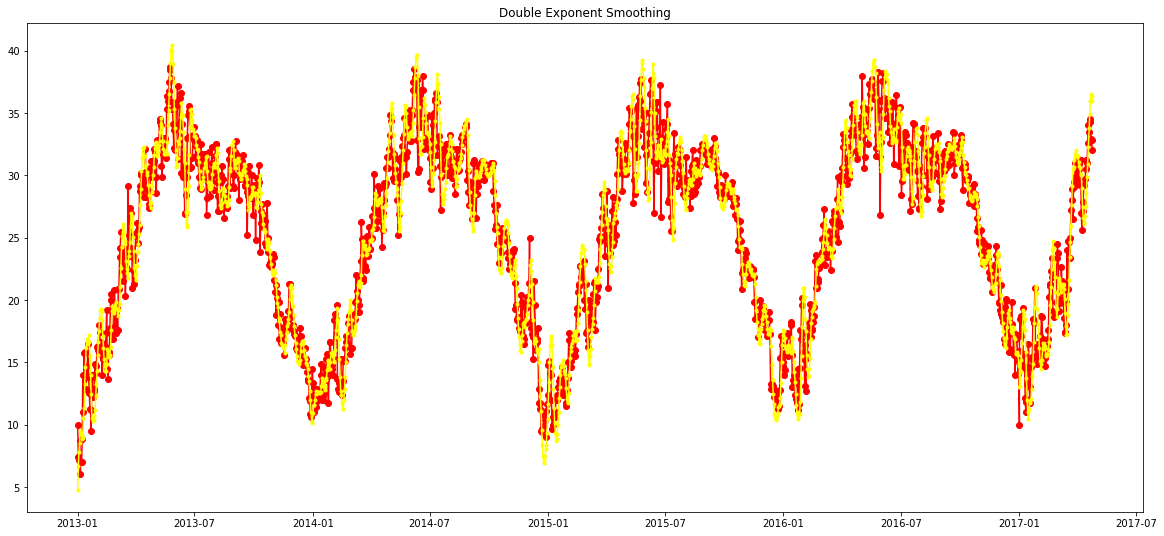

In [15]:
#plot the actual and smooth data

fig,ax = plt.subplots(1,1,figsize=(20, 9))
plt.title('Double Exponent Smoothing')
plt.plot(data,marker='o',color='red',label='Actual Temp')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.show()



### Triple Exponent Smoothing (trend and seasonality)

In [16]:
elec_data = new_df

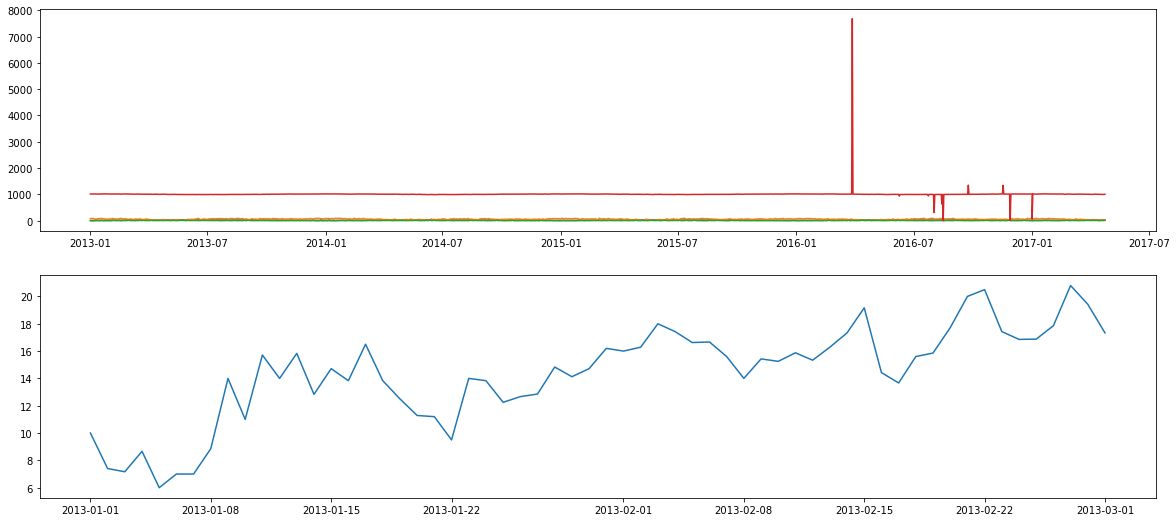

In [17]:
# plot the data
fig,ax = plt.subplots(2,1,figsize=(20, 9))
plt.subplot(211)
plt.plot(elec_data)
plt.subplot(212)
plt.plot(data[0:60])
plt.show()

## Task - 2

In [18]:
# read the file
path="C:\\Users\\Manish\\Downloads\\DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv"
stock = pd.read_csv(path)
mystock = elec_data[['meantemp']]
print(mystock)

             meantemp
date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000
...               ...
2017-04-20  34.500000
2017-04-21  34.250000
2017-04-22  32.900000
2017-04-23  32.875000
2017-04-24  32.000000

[1576 rows x 1 columns]


In [19]:
from statsmodels.tsa.stattools import adfuller
def checkStationarity(new):
    pvalue = adfuller(new)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [20]:
print(checkStationarity(mystock))

pvalue=0.14769623489792477. Data is not Stationary. Make the data stationary before model building


In [21]:
# difference the data by 1 (default)
diff_mystock = mystock - mystock.shift()
print(diff_mystock)

            meantemp
date                
2013-01-01       NaN
2013-01-02 -2.600000
2013-01-03 -0.233333
2013-01-04  1.500000
2013-01-05 -2.666667
...              ...
2017-04-20  1.000000
2017-04-21 -0.250000
2017-04-22 -1.350000
2017-04-23 -0.025000
2017-04-24 -0.875000

[1576 rows x 1 columns]


In [22]:
# remove the Nulls from the differenced data
print('Before removing Nulls,total records = ', len(diff_mystock))
diff_mystock.dropna(inplace = True)
print('After removing Nulls, total records = ', len(diff_mystock))
print(diff_mystock)

Before removing Nulls,total records =  1576
After removing Nulls, total records =  1575
            meantemp
date                
2013-01-02 -2.600000
2013-01-03 -0.233333
2013-01-04  1.500000
2013-01-05 -2.666667
2013-01-06  1.000000
...              ...
2017-04-20  1.000000
2017-04-21 -0.250000
2017-04-22 -1.350000
2017-04-23 -0.025000
2017-04-24 -0.875000

[1575 rows x 1 columns]


In [23]:
#check if the differenced data is stationary
checkStationarity(diff_mystock)

'pvalue=1.014093812317306e-29. Data is Stationary. Proceed to model building'

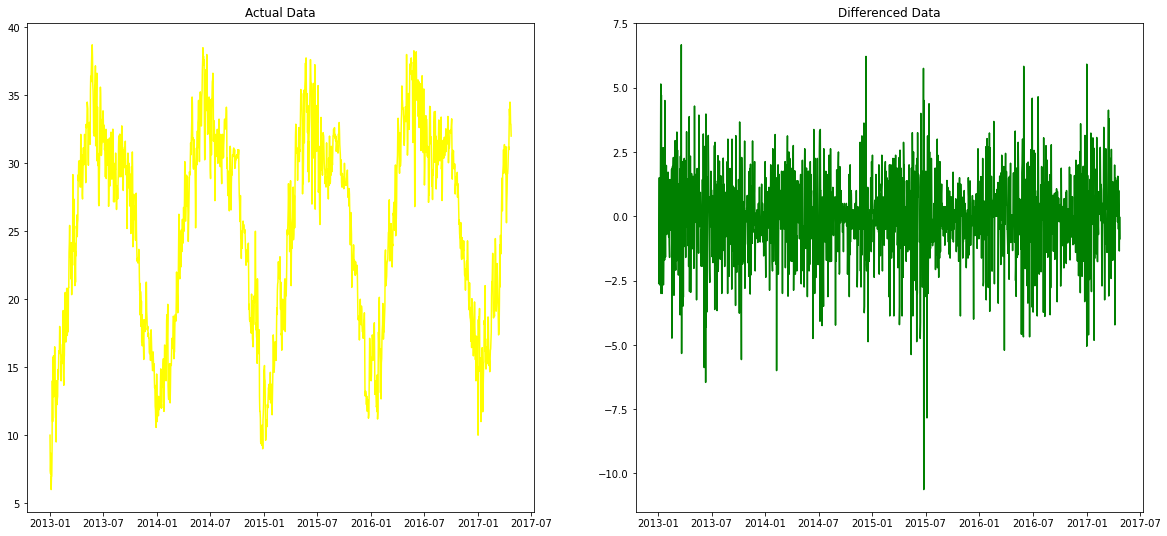

In [24]:
# plot the Actual data and Differenced data
fig,ax = plt.subplots(1,2,figsize=(20, 9))
plt.title("Actual vs Differenced data")
plt.subplot(121)
plt.plot(mystock,color='yellow')
plt.title('Actual Data')

plt.subplot(122)
plt.plot(diff_mystock,color='green')
plt.title('Differenced Data')
plt.show()


## TASK - 3 

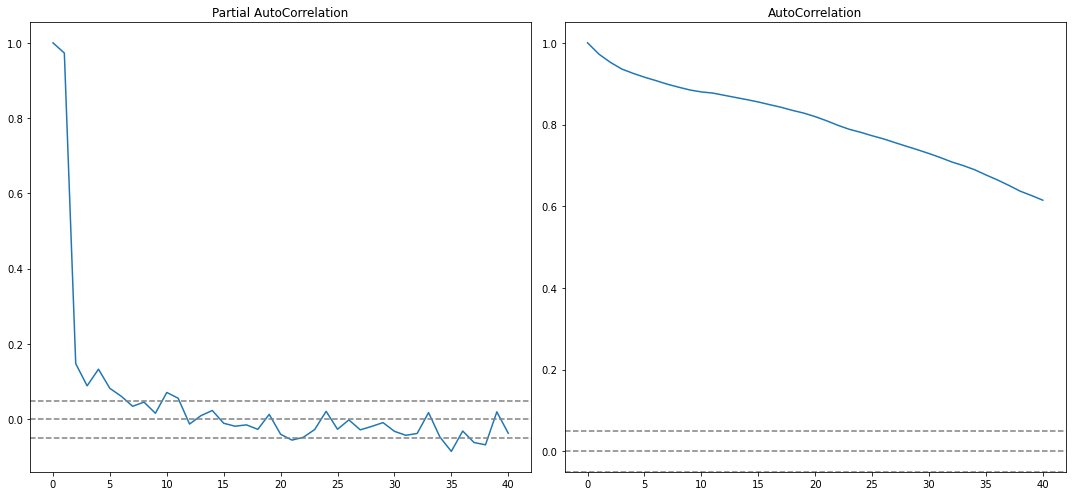

In [25]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(data, nlags=40)
lag_pacf = pacf(data, nlags=40, method='ols')

fig,ax = plt.subplots(1,2,figsize=(15, 7))
#plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

In [26]:
# split the data into train and test
ss = int(0.7 * len(data))

train = data.iloc[:ss]
test = data.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 1103, test = 473


### Build the ARMA Model

In [27]:
# start with initial values for p and q
p=1; q=1
m1 = ARIMA(train,order=(p,0,q)).fit()
print(m1.summary())

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2108.414
Date:                Wed, 27 Apr 2022   AIC                           4224.827
Time:                        14:09:30   BIC                           4244.850
Sample:                    01-01-2013   HQIC                          4232.401
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4737      2.468      9.511      0.000      18.636      28.311
ar.L1          0.9865      0.005    200.366      0.000       0.977       0.996
ma.L1         -0.2173      0.025     -8.756      0.0

### Use test data to predict the temperature using the Model

In [28]:
# predictions
predictions = m1.predict(0,len(test)-1)
print(predictions)

# start = len(train)
# end = len(data) - 1
# print("start = {}, end = {}".format(start,end))

2013-01-01    23.473703
2013-01-02    10.309271
2013-01-03     8.222228
2013-01-04     7.616037
2013-01-05     8.638498
                ...    
2014-04-14    27.232228
2014-04-15    27.483522
2014-04-16    28.595714
2014-04-17    27.395285
2014-04-18    26.557528
Freq: D, Name: predicted_mean, Length: 473, dtype: float64


### Print actual, predicted, and error values to compare

In [29]:
# actual vs predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

        actual  predicted        err
0    15.857143  23.473703  -7.616561
1    15.625000  10.309271   5.315729
2    15.750000   8.222228   7.527772
3    18.000000   7.616037  10.383963
4    18.266667   8.638498   9.628169
..         ...        ...        ...
468  34.500000  27.232228   7.267772
469  34.250000  27.483522   6.766478
470  32.900000  28.595714   4.304286
471  32.875000  27.395285   5.479715
472  32.000000  26.557528   5.442472

[473 rows x 3 columns]


### Plot the errors

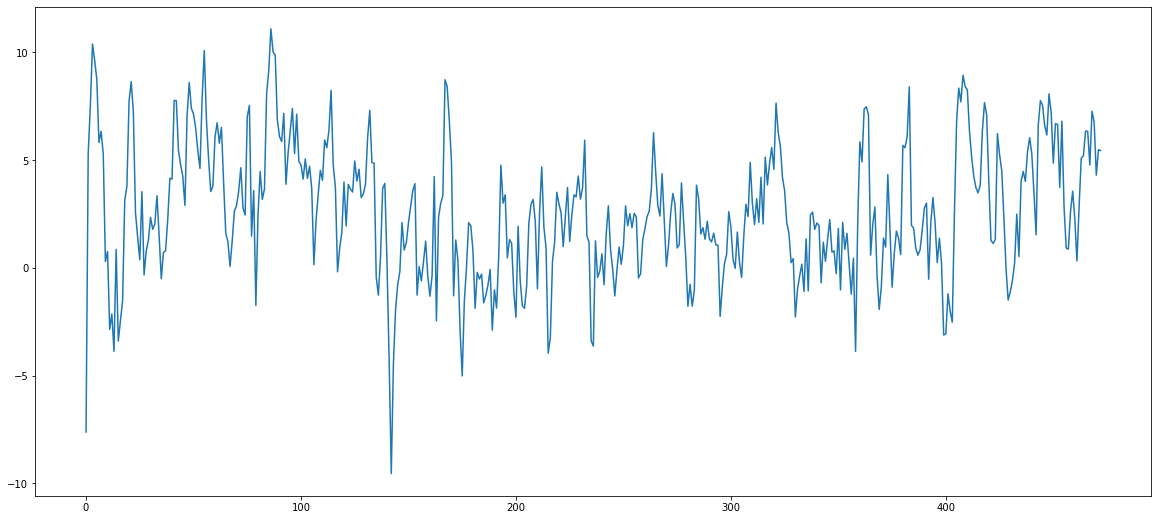

In [30]:
# errors
fig,ax = plt.subplots(1,1,figsize=(20, 9))
df_res.err.plot()
plt.show()

### Perform the LJung-Box test

In [31]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Calculate MSE and RMSE of the Model from the test

In [35]:
# MSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(1,1)
	MSE = 16.225900848889484
	RMSE = 4.028138633275856


In [33]:
print(df_res)

        actual  predicted        err
0    15.857143  23.473703  -7.616561
1    15.625000  10.309271   5.315729
2    15.750000   8.222228   7.527772
3    18.000000   7.616037  10.383963
4    18.266667   8.638498   9.628169
..         ...        ...        ...
468  34.500000  27.232228   7.267772
469  34.250000  27.483522   6.766478
470  32.900000  28.595714   4.304286
471  32.875000  27.395285   5.479715
472  32.000000  26.557528   5.442472

[473 rows x 3 columns]


### Plot the actual data and predicted data

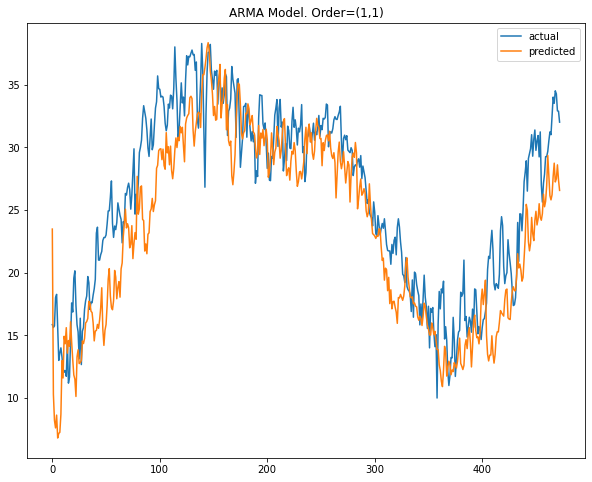

In [34]:
fig,ax = plt.subplots(1,1,figsize=(20, 9))
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)
plt.show()